In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [619]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [623]:
df.shape

(10841, 13)

In [625]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [627]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [629]:
#Drop Duplicates
df_no_duplicates = df.drop_duplicates(subset=['app'])
df = df_no_duplicates.copy()
df_clean = df.copy()

In [631]:
df_clean['rating'] = df_clean['rating'].astype(str).str.strip()
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].median())
df_clean['rating'] = df_clean['rating'].replace(19.0, 3.0)

In [633]:
df_clean['installs'] = df_clean['installs'].astype(str).str.strip()
df_clean['installs'] = df_clean['installs'].str.replace(',', '')
df_clean['installs'] = df_clean['installs'].str.replace('+', '')
df_clean['installs'] = df_clean['installs'].str.replace(' ', '')
df_clean['installs'] = pd.to_numeric(df_clean['installs'], errors='coerce')
df_clean['installs'] = df_clean['installs'].fillna(df_clean['installs'].median())

In [637]:
df_clean['price'] = df_clean['price'].astype(str).str.strip()
df_clean['price'] = df_clean['price'].str.replace('$', '')
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

In [639]:
df_clean['size'] = df_clean['size'].astype(str).str.strip()
df_clean['size'] = df_clean['size'].str.replace('M', '')
df_clean['size'] = pd.to_numeric(df_clean['size'], errors='coerce')
df_clean['size'] = df_clean['size'] * 8

In [641]:
df_clean['revenue_estimate'] = df_clean['price'] * df_clean['installs']

In [649]:
df_clean['size_mb'] = df_clean['size']

In [687]:
df_clean['reviews'] = pd.to_numeric(df_clean['reviews'], errors='coerce')

In [733]:
df_clean['type'] = df_clean['type'].str.replace('0','Free')

In [735]:
df = df_clean.copy()

In [669]:
top_installs = df.sort_values('installs', ascending=False).head(10)

In [695]:
high_rated = df[df['reviews'] > 10000].sort_values('reviews', ascending=False)

In [739]:
avg_rating = df.groupby('type')['rating'].mean()
avg_rating

type
Free    4.185916
Paid    4.267725
Name: rating, dtype: float64

In [741]:
avg_install = df.groupby('type')['installs'].mean()
avg_install

type
Free    8.430556e+06
Paid    7.587947e+04
Name: installs, dtype: float64

In [745]:
avg_review = df.groupby('type')['reviews'].mean()
avg_review

type
Free    234243.688532
Paid      8724.887566
Name: reviews, dtype: float64

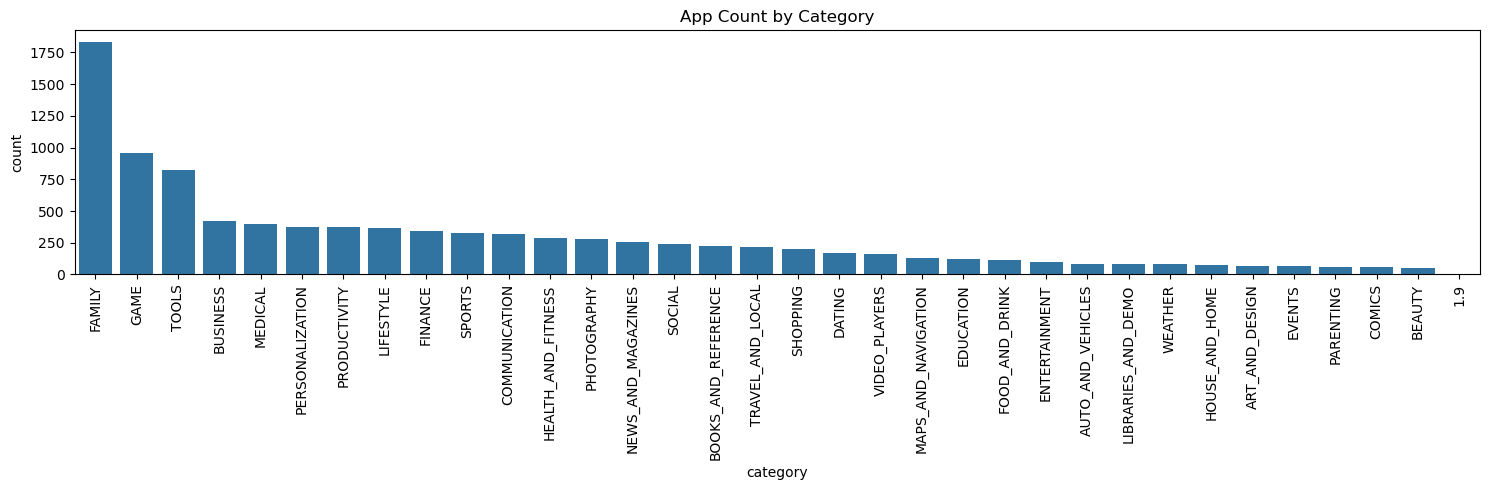

In [807]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('App Count by Category')
plt.tight_layout()
plt.savefig('countplot')
plt.show()

Text(0.5, 1.0, 'Ratings by app type')

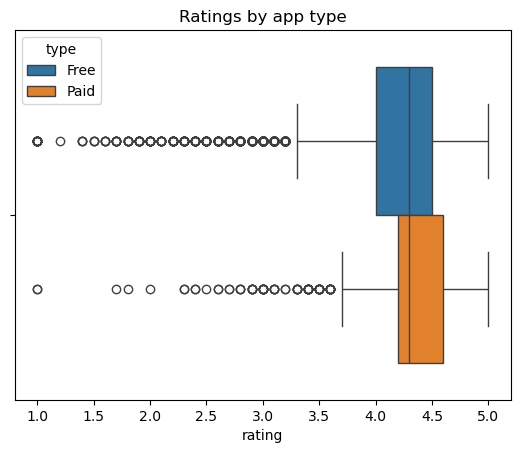

In [781]:
sns.boxplot(data=df, x='rating', hue='type')
plt.title('Ratings by app type')

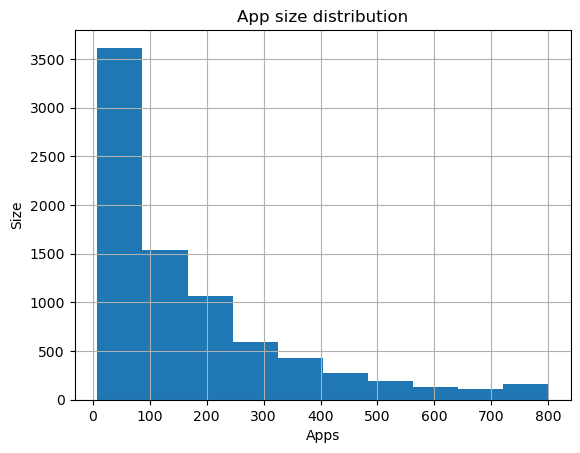

In [809]:
df['size'].hist(bins=10)
plt.title('App size distribution')
plt.xlabel('Apps')
plt.ylabel('Size')
plt.savefig('hist')

<Axes: xlabel='rating', ylabel='reviews'>

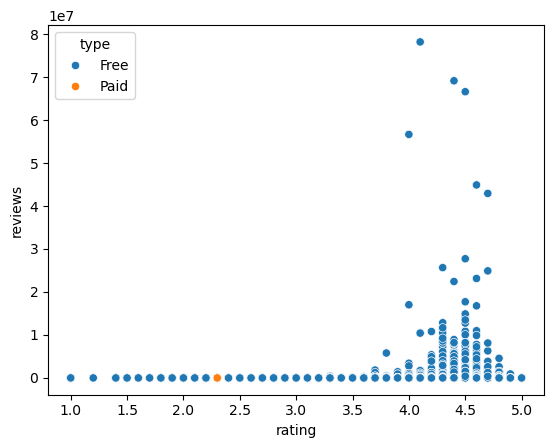

In [799]:
sns.scatterplot(data=df, x='rating', y='reviews', hue='type')

Text(0, 0.5, 'Frequency')

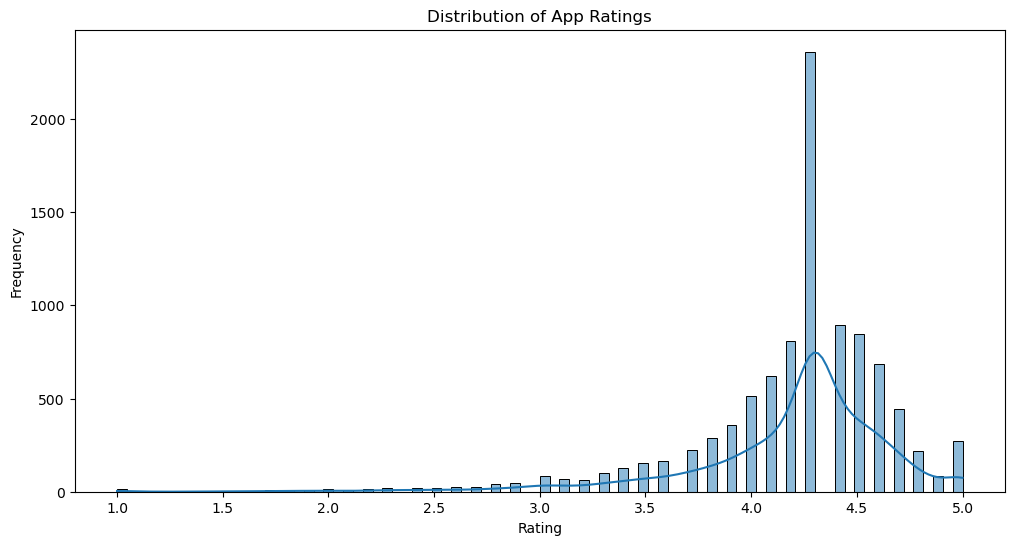

In [803]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['rating'].dropna(), kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

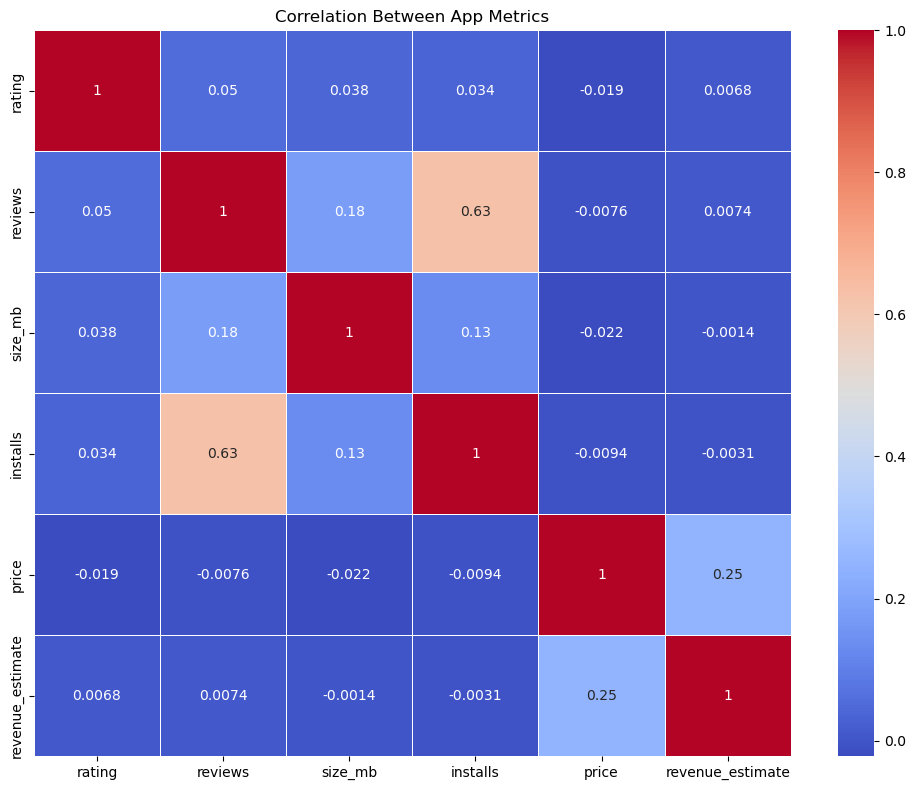

In [805]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df_clean[['rating', 'reviews', 'size_mb', 'installs', 'price', 'revenue_estimate']]
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between App Metrics')
plt.tight_layout()